In [11]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import scipy

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

import psycopg2 as pg
import pandas.io.sql as pd_sql
import warnings
warnings.filterwarnings('ignore')

In [2]:
connection_args = {
    'host': 'localhost',  
    'dbname': 'cps',    
    'port': 5432
}

conn = pg.connect(**connection_args)

In [4]:
cur = conn.cursor()
query = ('''SELECT * FROM hs_modeldata WHERE log_grad_rate IS NOT NULL''');
df = pd_sql.read_sql(query, conn)

In [6]:
df.sort_values('log_grad_rate', ascending=True)

school_id            school_year  student_count_total  fully_accessible  \
240     609680  School Year 2017-2018                 1153                 1   
241     609678  School Year 2017-2018                 1918                 0   
93      609749  School Year 2016-2017                 1062                 1   
110     609693  School Year 2016-2017                 1199                 1   
215     609749  School Year 2017-2018                 1091                 1   
24      609755  School Year 2016-2017                 2156                 0   
143     609755  School Year 2017-2018                 2211                 0   
86      609720  School Year 2016-2017                 4447                 0   
207     609720  School Year 2017-2018                 4514                 0   
116     609680  School Year 2016-2017                 1072                 1   
221     400098  School Year 2017-2018                  973                 0   
119     400064  School Year 2017-2018                  381                 1   
..         ...                    ...                  ...               ...   
191     400147  School Year 2017-2018                  295                 0   
82      609766  School Year 2016-2017                  234                 0   
127     609750  School Year 2017-2018                   34                 0   
8       609750  School Year 2016-2017                   38                 0   
203     609766  School Year 2017-2018                  228                 0   
60      609744  School Year 2016-2017                  230                 1   
125     609748  School Year 2017-2018                  184                 0   
6       609748  School Year 2016-2017                  199                 0   
57      609783  School Year 2016-2017                  208                 0   
177     609783  School Year 2017-2018                  190                 0   
84      610557  School Year 2016-2017                  227                 0   
180     609744  School Year 2017-2018                  220                 1   

     generally_accessible  student_count_asian_perc  \
240                     0                     0.174   
241                     1                     0.143   
93                      0                     0.197   
110                     0                     0.040   
215                     0                     0.203   
24                      1                     0.159   
143                     1                     0.167   
86                      1                     0.105   
207                     1                     0.105   
116                     0                     0.179   
221                     1                     0.037   
119                     0                     0.008   
..                    ...                       ...   
191                     0                     0.000   
82                      1                     0.021   
127                     0                     0.000   
8                       0                     0.000   
203                     1                     0.018   
60                      0                     0.043   
125                     0                     0.000   
6                       0                     0.000   
57                      0                     0.005   
177                     0                     0.005   
84                      0                     0.000   
180                     0                     0.041   

     student_count_asian_pacific_islander_perc  student_count_black_perc  \
240                                  0.000e+00                     0.108   
241                                  1.043e-03                     0.119   
93                                   2.825e-03                     0.073   
110                                  0.000e+00                     0.538   
215                                  6.416e-03                     0.075   
24                                   

In [7]:
#pairplot is huge, so it is saved as an svg in figures/eda.
#sns.pairplot(df)
#plt.savefig('figures/EDA/pairplot_all.svg')
df_dem_subset = df[['log_grad_rate','student_count_total','student_count_asian_perc',
                'student_count_asian_pacific_islander_perc',
                'student_count_black_perc','student_count_english_learners_perc',
                'student_count_ethnicity_not_available_perc',
                'student_count_hawaiian_pacific_islander_perc', 
                'student_count_hispanic_perc','student_count_low_income_perc', 
                 'student_count_multi_perc','student_count_native_american_perc', 
                 'student_count_other_ethnicity_perc',
                'student_count_special_ed_perc','student_count_white_perc']]
sns.pairplot(df_dem_subset, height=1.2, aspect=1.5);


/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


In [12]:
scipy.stats.skew(df['log_grad_rate'])

-0.5291607698422975

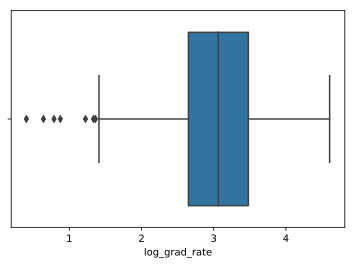

In [13]:
sns.boxplot(df['log_grad_rate'])

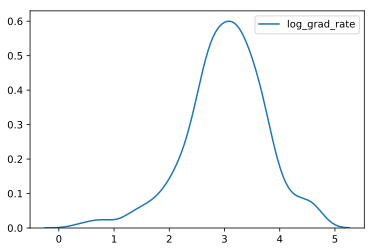

In [14]:
sns.kdeplot(df['log_grad_rate'])

In [16]:
#Try removing outliers outside of 3 STD of the mean.
df['log_grad_rate'].mean()

3.019720043155108

In [17]:
df_remove_outliers = df[(np.abs(df.log_grad_rate-df.log_grad_rate.mean())
                        <= 3*df.log_grad_rate.std())]

In [18]:
df_remove_outliers.head()

school_id            school_year  student_count_total  fully_accessible  \
0     400064  School Year 2016-2017                  388                 1   
1     400105  School Year 2016-2017                  322                 0   
2     609676  School Year 2016-2017                  455                 0   
3     400087  School Year 2016-2017                  198                 0   
4     609764  School Year 2016-2017                 1739                 0   

   generally_accessible  student_count_asian_perc  \
0                     0                     0.010   
1                     0                     0.000   
2                     1                     0.000   
3                     1                     0.000   
4                     1                     0.003   

   student_count_asian_pacific_islander_perc  student_count_black_perc  \
0                                        0.0                     0.869   
1                                        0.0                     0.975   
2                                        0.0                     0.965   
3                                        0.0                     0.924   
4                                        0.0                     0.033   

   student_count_english_learners_perc  \
0                                0.021   
1                                0.000   
2                                0.020   
3                                0.000   
4                                0.190   

   student_count_ethnicity_not_available_perc  \
0                                       0.000   
1                                       0.000   
2                                       0.000   
3                                       0.000   
4                                       0.006   

   student_count_hawaiian_pacific_islander_perc  student_count_hispanic_perc  \
0                                         0.005                        0.101   
1                                         0.000                        0.012   
2                                         0.000                        0.033   
3                                         0.000                        0.045   
4                                         0.000                        0.945   

   student_count_low_income_perc  student_count_multi_perc  \
0                          0.863                     0.010   
1                          0.814                     0.009   
2                          0.965                     0.000   
3                          0.924                     0.010   
4                          0.954                     0.002   

   student_count_native_american_perc  student_count_other_ethnicity_perc  \
0                               0.000                                 0.0   
1                               0.003                                 0.0   
2                               0.002                                 0.0   
3                               0.000                                 0.0   
4                               0.003                                 0.0   

   student_count_special_ed_perc  student_count_white_perc  \
0                          0.193                     0.005   
1                          0.193                     0.000   
2                          0.273                     0.000   
3                          0.313                     0.020   
4                          0.162                     0.007   

   classroom_langauges_count  blue  brown  green  orange  pink  purple  red  \
0                          1     0      0      1       0     0       0    1   
1                          2     0      0      1       0     0       0    1   
2                          2     0      0      0       0     0       0    0   
3                          1     0      0      0       0     0       0    1   
4                          2     1      0      0       0     1       0    1   

   dress_code_dummie  grades_offered_count  charter  gend

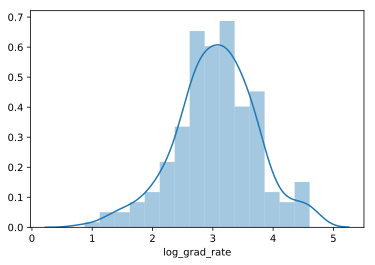

In [19]:
sns.distplot(df_remove_outliers['log_grad_rate'])

In [20]:
df_remove_outliers_2std = df[(np.abs(df.log_grad_rate-df.log_grad_rate.mean())
                        <= 2*df.log_grad_rate.std())]

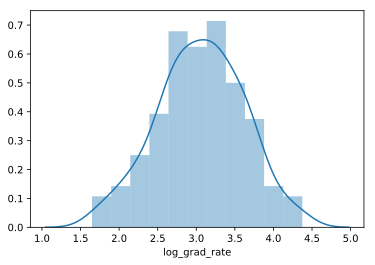

In [21]:
sns.distplot(df_remove_outliers_2std['log_grad_rate'])

## Correlation

In [22]:
df.corr()

school_id  student_count_total  \
school_id                                         1.000                0.156   
student_count_total                               0.156                1.000   
fully_accessible                                  0.088               -0.021   
generally_accessible                              0.006                0.125   
student_count_asian_perc                          0.144                0.451   
student_count_asian_pacific_islander_perc         0.019                0.191   
student_count_black_perc                         -0.176               -0.440   
student_count_english_learners_perc               0.144               -0.013   
student_count_ethnicity_not_available_perc       -0.050                0.203   
student_count_hawaiian_pacific_islander_perc      0.151                0.276   
student_count_hispanic_perc                       0.110                0.255   
student_count_low_income_perc                    -0.081               -0.396   
...                                                 ...                  ...   
green                                            -0.106               -0.246   
orange                                            0.008                0.279   
pink                                             -0.077                0.058   
purple                                           -0.018                0.167   
red                                              -0.028               -0.034   
dress_code_dummie                                -0.385               -0.331   
grades_offered_count                             -0.237                0.137   
charter                                          -0.950               -0.136   
gender_f_bn                                      -0.168               -0.182   
log_grad_rate                                     0.057               -0.451   
zip                                               0.121                0.013   
zip_mean_income                                  -0.022                0.370   

                                              fully_accessible  \
school_id                                                0.088   
student_count_total                                     -0.021   
fully_accessible                                         1.000   
generally_accessible                                    -0.658   
student_count_asian_perc                                 0.185   
student_count_asian_pacific_islander_perc                0.169   
student_count_black_perc                                -0.223   
student_count_english_learners_perc                      0.129   
student_count_ethnicity_not_available_perc               0.103   
student_count_hawaiian_pacific_islander_perc             0.083   
student_count_hispanic_perc                              0.186   
student_count_low_income_perc                           -0.051   
...                                                        ...   
green                                                   -0.013   
orange                                                   0.123   
pink                                                    -0.053   
purple                                                   0.019   
red                                                     -0.062   
dress_code_dummie                                       -0.081   
grades_offered_count                                     0.001   
charter                                                 -0.102   
gender_f_bn                                             -0.134   
log_grad_rate                                           -0.154   
zip                                                      0.069   
zip_mean_income                                          0.037   

                                              generally_accessible  \
school_id                                                    0.006   
student_count_total                                          0.125   
fully_accessible                      

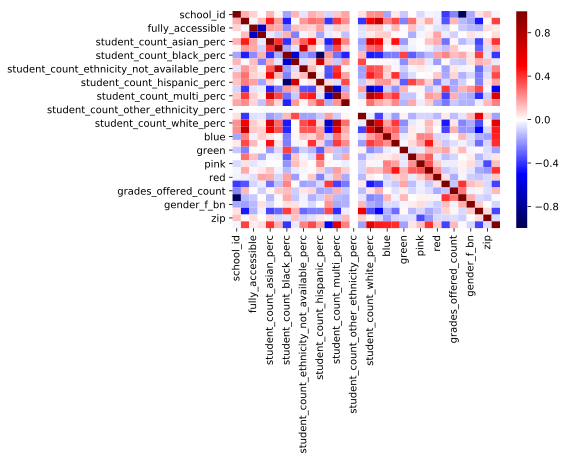

In [23]:
# example of a better corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);